In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('FullData.csv')
data = data.dropna()
data.head()

,Situs,city,zip,lat,lon,addr
0,"3817 DUDLEY ST, LINCOLN, NE 68503",LINCOLN,68503,40.825578444444446,-96.66587981481482,3817 DUDLEY ST
1,"802 N LAKESHORE DR, LINCOLN, NE 68528",LINCOLN,68528,40.82969630114534,-96.74044722145769,802 N LAKESHORE DR
2,"490 PANAMA RD, MARTELL, NE 68404",MARTELL,68404,na,na,490 PANAMA RD
3,"1208 STARVIEW LN, LINCOLN, NE 68512",LINCOLN,68512,40.75890030482155,-96.70395435186813,1208 STARVIEW LN
4,"9400 LARGE'S CT, LINCOLN, NE 68512",LINCOLN,68512,40.71798914143969,-96.68330070791247,9400 LARGE'S CT


In [4]:
X = data[['lat', 'lon', 'Situs']]
X = X[X['lat'] != 'na']

# remove any values not inside the lat/lon of lancaster county 
X = X[X['lat'].astype(float) >= 40]
X = X[X['lat'].astype(float) <= 42]

X = X[X['lon'].astype(float) >= -97]
X = X[X['lon'].astype(float) <= -96]

X.head()

X_cluster_on = X[['lat', 'lon']]

In [7]:
best_cluster_size = 11
kmeans = KMeans(n_clusters=best_cluster_size).fit(X_cluster_on)

In [8]:
delta_sample=X_cluster_on.sample(1000)
kmeans_sample = KMeans(n_clusters=best_cluster_size).fit(delta_sample)

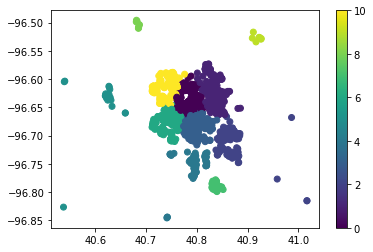

In [9]:
plt.scatter(delta_sample['lat'].astype(float), delta_sample['lon'].astype(float), c=kmeans_sample.labels_)
plt.colorbar()
plt.show()

In [10]:
# # plot sample of data on plot
# sns.set(style='whitegrid')
# sns.color_palette("tab10")
# sns.scatterplot(x="lat",
#                     y="lon",
#                     data=delta_sample, hue=kmeans_sample.labels_)
# plt.show()

# plt.scatter(X_cluster_on['lat'].astype(float), X_cluster_on['lon'].astype(float), c=kmeans_sample.labels_)
# plt.show()

In [11]:
X['cluster'] = kmeans.labels_
X.to_csv('FullDataWithClusters.csv')

In [13]:
print(X.head())

                  lat                 lon  \
0  40.825578444444446  -96.66587981481482   
1   40.82969630114534  -96.74044722145769   
3   40.75890030482155  -96.70395435186813   
4   40.71798914143969  -96.68330070791247   
5           40.866912          -96.689811   

                                    Situs  cluster  
0      3817 DUDLEY ST, LINCOLN, NE  68503        1  
1  802 N LAKESHORE DR, LINCOLN, NE  68528        3  
3    1208 STARVIEW LN, LINCOLN, NE  68512        6  
4     9400 LARGE'S CT, LINCOLN, NE  68512        6  
5  2100 FOLKWAYS BLVD, LINCOLN, NE  68521        4  


In [52]:
# df = pd.read_csv('results_closest_features_and_cluster.csv')
df = pd.read_csv('euc_results_closest_features.csv')

In [53]:
df.head()

,Unnamed: 0,Situs,city,zip,lat,lon,addr,dist_park,dist_downtown,dist_airport,dist_mall,dist_golf,dist_wholesaler,dist_fancy_grocers,cluster
0,0,"3817 DUDLEY ST, LINCOLN, NE 68503",LINCOLN,68503,40.825578,-96.665880,3817 DUDLEY ST,0.0008550164761491846,0.0014709841192225225,0.015660107729548418,0.0009392545666401875,0.0010905238545731346,0.0012910518484931842,0.0008750155051631341,5
1,1,"802 N LAKESHORE DR, LINCOLN, NE 68528",LINCOLN,68528,40.829696,-96.740447,802 N LAKESHORE DR,0.00020179079564116719,0.0011064432453349,0.0026100920101643403,0.010910324911542342,0.001312310502173128,0.004220497331848833,0.010542489670536274,1
2,3,"1208 STARVIEW LN, LINCOLN, NE 68512",LINCOLN,68512,40.758900,-96.703954,1208 STARVIEW LN,None,None,None,None,None,None,None,3
3,4,"9400 LARGE'S CT, LINCOLN, NE 68512",LINCOLN,68512,40.717989,-96.683301,9400 LARGE'S CT,0.0023075672324745565,0.002532708363106465,0.01441110955553265,0.0009642271697433226,0.0006850004644345382,0.0004019277079454005,0.0011685378765605191,3
4,5,"2100 FOLKWAYS BLVD, LINCOLN, NE 68521",LINCOLN,68521,40.866912,-96.689811,2100 FOLKWAYS BLVD,0.0017131478707198698,0.008599192817511713,0.026922173296719535,0.0005178019749526448,0.003750903411410963,0.0006840412805363114,0.0005996804371354068,2
